# HTW-Berlin - Informatik und Wirtschaft - Aktuelle Trends - Machine Learning: Logistic Regression Exercise

## Table of Contents

* [Introduction](#Introduction)
  * [Required Knowledge](#Required-Knowledge)
  * [Required Python Modules](#Required-Python-Modules)


* [Logistic Regression](#Linear-Regression)
  * [Exercise: Sigmoid](#Exercise:-Sigmoid)
  * [Exercise: Hypothesis](#Exercise:-Hypothesis)
  + [Exercise: Classifier](# Exercise:-Classifier)
  * [Exercise: Cost](#Exercise:-Cost)
  * [Exercise: Gradient](#Exercise:-Gradient)
  * [Exercise: Stochastic Gradient Descent](#Exercise:-Stochastic-Gradient-Descent)
  * [Exercise: Plot Cost per Epoch](#Exercise:-Plot-Cost-per-Epoch)
  * [Plot Boundary](#Plot-Boundary)


* [Summary and Outlook](#Summary-and-Outlook)
* [Licenses](#Licenses)

## Introduction

Goal of this exercise is to implement Logistic Regression in Python. You can use the Python standard library and math functions from numpy. This notebook guides you through the implementation process.

This notebooks implements tests using `assert` or `np.testing.assert_almost_equal`. If you run the corresponding notebook cell and no output appears, the test has passed. Otherwise an exception is raised.

**General Hint:**

If you have problems with the implementation (e.g. you don't know how to call a certain function or you don't know how to loop through the dataset), make use of the interactive nature of the notebook. You can at all times add new cells to the notebook to inspect defined variables or to try small code snippets.

### Required Knowledge

This exercise is part of the course "Aktuelle Trends der Informations- und Kommunikationstechnik". The fundamentals of Logistic Regression are taught in class.

* The PDF slides used in class are [available](../../../../../slides/courses/htw-berlin/informatik-und-wirtschaft/aktuelle-trends/logistic-regression.pdf) in the educational-materials repository.
* For other teaching materials refer to Chapter 4 of the open classroom [Machine Learning](http://openclassroom.stanford.edu/MainFolder/CoursePage.php?course=MachineLearning) by Andrew Ng.

### Required Python Modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from deep_teaching_commons.data.fundamentals.iris import Iris

/home/christoph/.local/share/virtualenvs/educational-materials-Ei5qxOuI/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/christoph/.local/share/virtualenvs/educational-materials-Ei5qxOuI/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Required Data

In [2]:
base_data_dir = os.path.expanduser('~/deep.TEACHING/data')
dm = Iris(base_data_dir=base_data_dir)  # data manager
iris = dm.dataframe()

auto download is active, attempting download
data directory already exists, no download required


In [3]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
df_reduced = iris.query('species == "Iris-versicolor" | species == "Iris-virginica"')
df_reduced.head()

sepal_length  sepal_width  petal_length  petal_width          species
50           7.0          3.2           4.7          1.4  Iris-versicolor
51           6.4          3.2           4.5          1.5  Iris-versicolor
52           6.9          3.1           4.9          1.5  Iris-versicolor
53           5.5          2.3           4.0          1.3  Iris-versicolor
54           6.5          2.8           4.6          1.5  Iris-versicolor

In [5]:
X = df_reduced[['petal_width', 'petal_length']].values
Y = df_reduced['species'].replace({'Iris-versicolor': 0, 'Iris-virginica': 1}).values

In [6]:
X[:5]

array([[1.4, 4.7],
       [1.5, 4.5],
       [1.5, 4.9],
       [1.3, 4. ],
       [1.5, 4.6]])

In [7]:
Y[:5]

array([0, 0, 0, 0, 0])

In [8]:
X.shape, Y.shape

((100, 2), (100,))

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled[:5]

array([[-0.65303909, -0.25077906],
       [-0.41643072, -0.49425387],
       [-0.41643072, -0.00730424],
       [-0.88964745, -1.10294091],
       [-0.41643072, -0.37251647]])

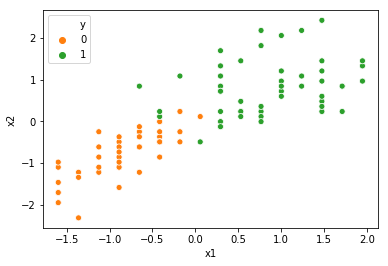

In [11]:
cp = sns.color_palette()
df_scaled = pd.DataFrame(X_scaled, columns=['x1', 'x2'])
df_scaled['y'] = Y
sns.scatterplot(data=df_scaled, x='x1', y='x2', hue='y', palette=cp[1:3]);

## Logistic Regression

### Exercise: Sigmoid

The sigmoid function is defined as follows:

$$
sigmoid(t) = \frac{1}{1 + e^{-t}}
$$

Implement this function below. You should use `np.exp` to calculate $e^{-t}$.

In [12]:
def sigmoid(t):
    raise NotImplementedError('implement this function')

In [14]:
sigmoid(0)

0.5

In [15]:
# run tests
np.testing.assert_almost_equal(sigmoid(0), 0.5)
np.testing.assert_almost_equal(sigmoid(1), 0.7310585786300049)

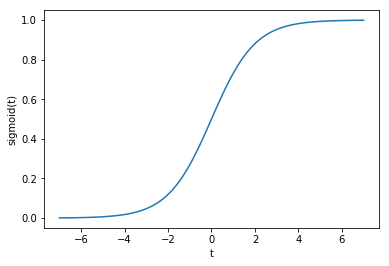

In [16]:
spacing = np.linspace(-7, 7, 100)
plt.plot(spacing, [sigmoid(t) for t in spacing]);
plt.xlabel('t')
plt.ylabel('sigmoid(t)');

### Exercise: Hypothesis

The logistic hypothesis is defined as follows:

$$
h(x_1, x_2) = sigmoid(x_1 w_1 + x_2 w_2 + b)
$$

The hypothesis is a function of $x_1$ and $x_2$, where the parameters $w_1$, $w_2$ and $b$ are treated as constants.

Implement this function in Python as a closure.

In [17]:
def make_logistic_hypothesis(w1, w2, b):
    # this is a closure
    def logistic_hypothesis(x1, x2):
        raise NotImplementedError('implement this function')
    
    return logistic_hypothesis

In [19]:
w1, w2, b = 3.3, 3.7, 0.3
h = make_logistic_hypothesis(w1, w2, b)

The hypothesis $h$ is used to predict values for $y$ given $x$.

In [20]:
x1, x2 = -1, 1
h(x1, x2)

0.6681877721681662

In [21]:
# run a test
np.testing.assert_almost_equal(h(-1, 1), 0.6681877721681662)

### Exercise: Classifier

The logistic hypothesis calculates probability values in range $]0, 1[$. In order to decide wether a dataset is classfied as $1$ or $0$, we need to define a threshold as decision boundary. The function `classify` uses this threshold and is defined as follows.

$$
classify(x{_1}, x{_2}) \cases{1, & if $h(x_1, x_2) > threshold$ \\ 0, & otherwise}
$$

Implement `classify` in Python as a closure. You can use the already implemented function `logistic_hypothesis` inside of `classify` to create a new hypothesis.

In [22]:
def make_classify(w1, w2, b, threshold):
    def classify(x1, x2):
        raise NotImplementedError('implement this function')
    
    return classify

In [24]:
w1, w2, b = 3.3, 3.7, 0.3
threshold = 0.5
classify = make_classify(w1, w2, b, threshold)

In [25]:
x1, x2 = -1, -1
classify(x1, x2)

0

In [26]:
x1, x2 = 1, 1
classify(x1, x2)

1

In [27]:
# run tests
assert classify(-1, -1) == 0
assert classify(1, 1) == 1

### Exercise: Cost

The cost function is defined as follows:

$$
J(w1, w2, b) = \frac{1}{m} \sum_{i=1}^{m} y^{i} \cdot -ln(h(x_{1}^{i}, x_{2}^{i})) +  (1 - y^{i}) \cdot -ln(1 - h(x_{1}^{i}, x_{2}^{i}))
$$

Implement this function using a closure. The binary crossentropy cost function $J$ loops through the complete dataset of X and Y, to sums over the calculated cost values. As a last step the summation is divided by $m$, where $m$ is the number of samples in $X$.

$J$ is a function of $w_1$, $w_2$ and $b$, because we want to find the best parameters $w_1$, $w_2$ and $b$ providing the lowest possible cost. Therefore the data $X$ and $Y$ is treated as a constant. You can use the already implemented function `logistic_hypothesis` inside of $J$ to create a new hypothesis. Use numpy's build-in function `np.log` to calculate the logarithmus naturalis $ln$.

In [28]:
def make_binary_crossentropy_cost(X, Y):
    def binary_crossentropy_cost(w1, w2, b):
        raise NotImplementedError('implement this function')
    
    return binary_crossentropy_cost

In [30]:
J = make_binary_crossentropy_cost(X_scaled, Y)

In [31]:
w1, w2, b = 3.3, 3.7, 0.3
J(w1, w2, b)

0.10736084146625315

In [32]:
# run a test
np.testing.assert_almost_equal(J(3.3, 3.7, 0.3), 0.10736084146625315)

### Exercise: Gradient

The partial derivatives (gradient) are used by the Stochastic Gradient Descent optimizer and are defined as follows:

$$
\begin{align}
\frac{\partial}{\partial w_1} J(w_{1}, w_{2}, b) &= \frac{1}{m}\sum_{i=1}^{m}(h(x_{1}^{i}, x_{2}^{i}) - y^{i}) \cdot x_{1}^{i}\\
\frac{\partial}{\partial w_2} J(w_{1}, w_{2}, b) &= \frac{1}{m}\sum_{i=1}^{m}(h(x_{1}^{i}, x_{2}^{i}) - y^{i}) \cdot x_{2}^{i}\\
\frac{\partial}{\partial b} J(w_{1}, w_{2}, b) &= \frac{1}{m}\sum_{i=1}^{m}(h(x_{1}^{i}, x_{2}^{i}) - y^{i})
\end{align}
$$

Implement a function `gradient`, which calculates at a point $w1, w2, b$ the partial derivatives $pd\_w1$, $pd\_w2$ and $pd\_b$. Return all three values from the function.

In [33]:
def make_gradient(X, Y):
    def gradient(w1, w2, b):
        raise NotImplementedError('implement this function')
        
        pd_w1 = None
        pd_w2 = None
        pd_b = None
        
        return pd_w1, pd_w2, pd_b
    
    return gradient

In [35]:
gradient = make_gradient(X, Y)

In [36]:
w1, w2, b = 3.3, 3.7, 0.3
gradient(w1, w2, b)

(0.6629999910605702, 2.129999972002591, 0.49999999158653635)

In [37]:
# run a test
np.testing.assert_almost_equal(gradient(3.3, 3.7, 0.3), (0.6629999910605702, 2.129999972002591, 0.49999999158653635))

### Exercise: Stochastic Gradient Descent

The following pseude code shows the iterative parameter updates of Stochastic Gradient Descent:

---

Randomly initialize w and b.

For a number of epochs repeat:

$$
\begin{align}
pd\_w1 &:= \frac{\partial}{\partial w_1} J(w_1, w_2, b)\\
pd\_w2 &:= \frac{\partial}{\partial w_2} J(w_1, w_2, b)\\
pd\_b &:= \frac{\partial}{\partial b} J(w, b)\\\\
w1 &:= w1 - \alpha *  pd\_w1\\
w2 &:= w2 - \alpha *  pd\_w2\\
b &:= b - \alpha * pd\_b
\end{align}
$$

---

The function to be implemented is `stochastic_gradient_descent(X, Y, w1, w2, b, alpha, epochs)`, where `X, Y` is the data, `w1, w2, b` are the randomly initialized parameters, `alpha` is the learning rate and `epochs` is the number of training iterations. You should return the values of $w_1$, $w_2$ and $b$, as well as a list of the cost after each training epoch.

In [38]:
def sgd(X, Y, w1, w2, b, alpha, epochs):
    raise NotImplementedError('implement this function')
    
    cost_per_epoch = []
    
    return w1, w2, b, cost_per_epoch

In [40]:
alpha = 0.1
epochs = 1500
w1, w2, b = np.random.randn(3)
w1, w2, b, cost_per_epoch = sgd(X_scaled, Y, w1, w2, b, alpha, epochs)
w1, w2, b

(3.674818166432051, 3.0140540933071414, 0.33998671273719794)

In [41]:
len(cost_per_epoch)

1500

In [42]:
# run tests
test_w1, test_w2, test_b, test_cost_per_epoch = sgd(X_scaled, Y, -1.58979407,  0.26957035, -1.92309864, 0.1, 1500)
print(test_w1, test_w2, test_b)
np.testing.assert_almost_equal(len(test_cost_per_epoch), 1500)
np.testing.assert_almost_equal((test_w1, test_w2, test_b), (3.234979367208197, 3.5709689275028116, 0.2978914362922387))

3.234979367208197 3.5709689275028116 0.2978914362922387


### Exercise: Plot Cost per Epoch

Plot the `cost_per_epoch` result of `sgd`.

In [43]:
def plot_over_time(cost_per_epoch):
    raise NotImplementedError('implement this function')

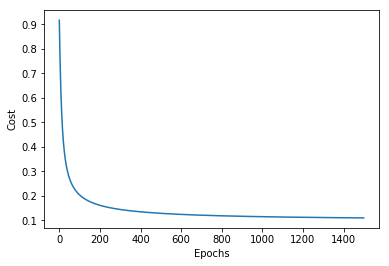

In [45]:
plot_over_time(cost_per_epoch)

You can try out different `alpha` values and see how the training performance changes.

### Plot Boundary

This is not an exercise. Run the code below to visualize the decision boundary your implementation of Logistic Regression determined.

In [46]:
def make_decision_boundary(w1, w2, b, threshold):
    def decision_boundary(x1):
        return (np.log(threshold / (1 - threshold)) - x1*w1 - b) * (1 / w2)
    
    return decision_boundary

In [47]:
def plot_boundary(df, decision_boundary):
    sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette=sns.color_palette()[1:3])
    
    spacing = np.linspace(df['x1'].min(), df['x1'].max(), 10)
    boundary_values = np.array([decision_boundary(x1) for x1 in spacing])

    plt.plot(spacing, boundary_values, label='boundary')

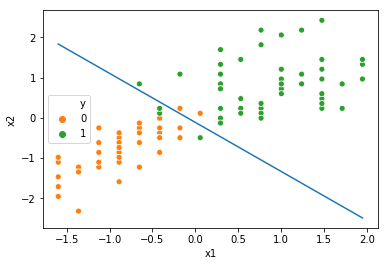

In [48]:
plot_boundary(df_scaled, make_decision_boundary(w1, w2, b, threshold))

## Summary and Outlook

You have learned how to implement Logistic Regression with two inputs and one output variable to solve simple classification problems. The algorithms were implemented in Python, without the help of higher level libraries like Tensorflow or Keras.

The next part of the course covers evaluation scores for classification tasks.

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g. images).*

HTW-Berlin - Informatik und Wirtschaft - Aktuelle Trends - Machine Learning: Logistic Regression Exercise<br/>
by [Christoph Jansen (deep.TEACHING - HTW Berlin)](https://www.htw-berlin.de/hochschule/personen/person/?eid=9225)<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christoph Jansen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.